In [3]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from helpers.cm26 import DatasetCM26, read_datasets
from helpers.selectors import select_NA, select_Pacific, select_Cem, select_globe, compare, plot, select_ACC, select_Equator
from helpers.operators import Coarsen, Filtering, Subsampling, CoarsenKochkov, CoarsenWeighted, CoarsenKochkovMinMax
from helpers.state_functions import *

import hvplot.xarray
import hvplot
import cmocean

%load_ext autoreload
%autoreload 3

In [90]:
def read_skill(exp='EXP0', factors=[4,9,12,15]):
    ds = []
    for factor in factors:
        dataset = xr.open_dataset(f'/scratch/pp2681/mom6/CM26_ML_models/ocean3d/Gauss-FGR3/{exp}/skill-test/factor-{factor}.nc', chunks={'zl':1})
        ds.append(dataset)
    ds = xr.concat(ds, dim='factor')
    ds['factor'] = factors
    return ds

In [91]:
exp0 = read_skill('EXP0')
exp1 = read_skill('EXP1')
exp2 = read_skill('EXP2')
exp3 = read_skill('EXP3')
exp4 = read_skill('EXP4')

In [92]:
import cmocean
def plot_metric(exp=exp0, metric='R2',vmin=-1,vmax=1):
    exp[metric].drop_vars(['zl','factor']).plot(x='factor', y='zl',cmap=cmocean.cm.balance, vmin=vmin, vmax=vmax, cbar_kwargs={'label':''})
    plt.yticks(np.arange(10),[5, 55, 110, 180,330, 730,1500,2500,3500,4500]);
    plt.ylabel('Depth, m')
    plt.xticks(np.arange(4),[4,9,12,15]);
    if metric == 'R2':
        plt.title('$R^2$ global')
    elif metric == 'corr':
        plt.title('Correlation global')
    elif metric == 'opt_scaling':
        plt.title('Optimal scaling')
    plt.xlabel('Coarsegraining factor')
    plt.gca().invert_yaxis()

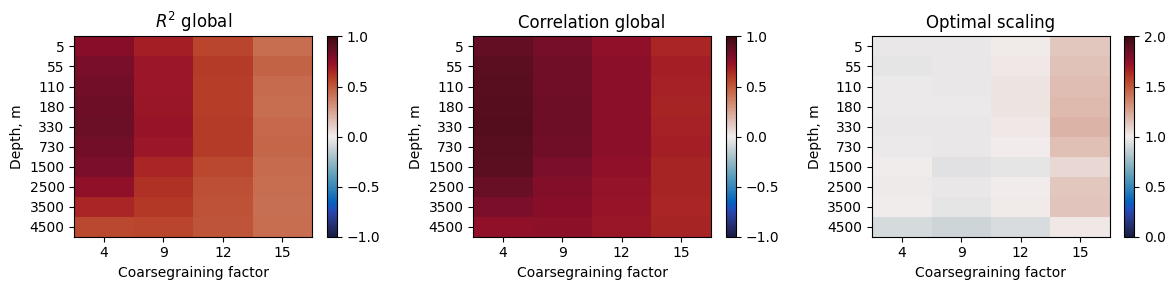

In [93]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plot_metric(exp0,'R2')
plt.subplot(1,3,2)
plot_metric(exp0,'corr')
plt.subplot(1,3,3)
plot_metric(exp0,'opt_scaling',vmin=0,vmax=2)
plt.tight_layout()
plt.savefig('global_metrics/EXP0.pdf', bbox_inches='tight')

Text(0.5, 1.0, 'Dimensional scaling + physical parameters \n Trained at all factors and depths')

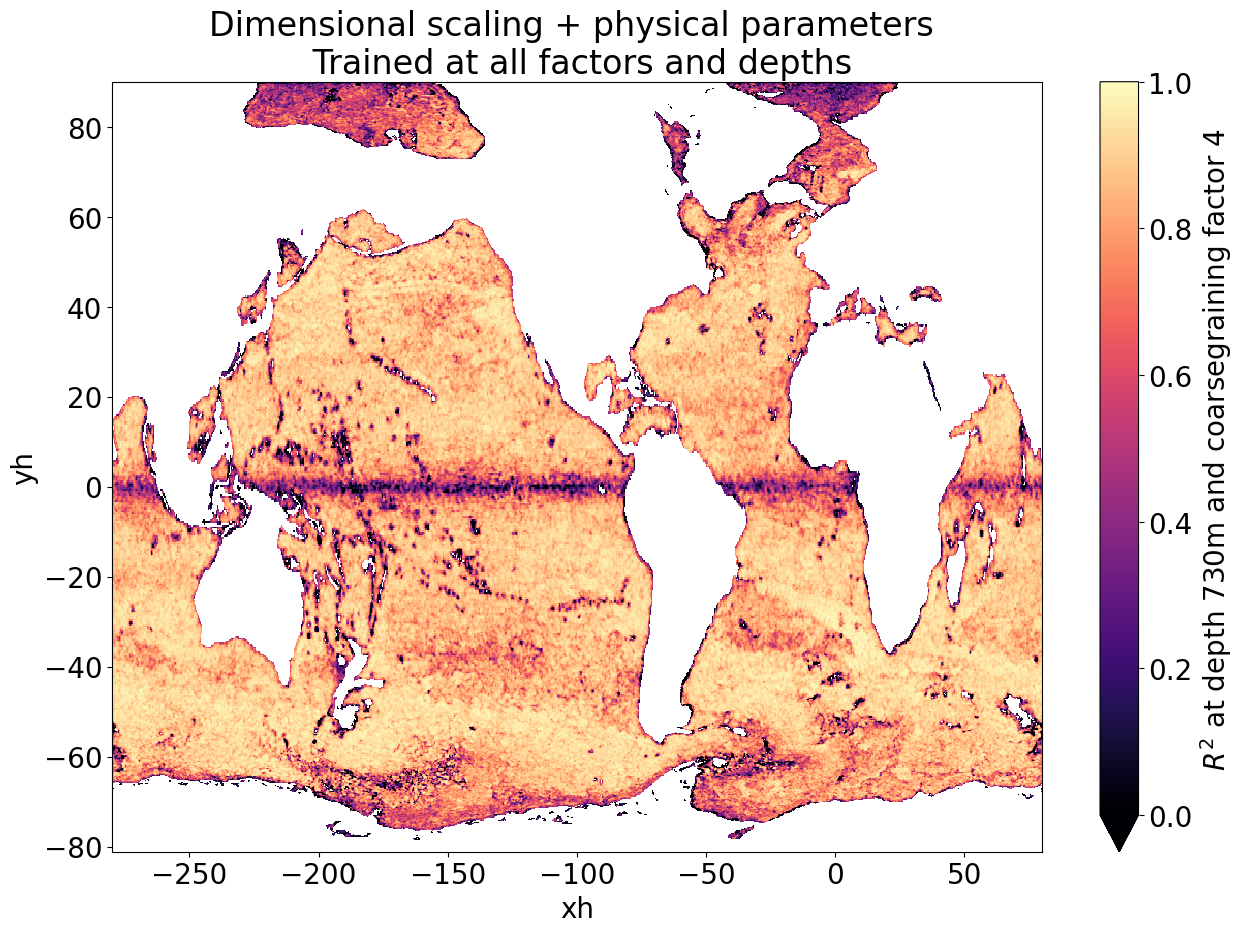

In [128]:
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
read_skill('EXP0', factors=[4]).R2_map.isel(zl=5).plot(vmax=1,vmin=0, cmap=mpl.cm.magma, cbar_kwargs={'label': '$R^2$ at depth 730m and coarsegraining factor 4'})
plt.title('Dimensional scaling + physical parameters \n Trained at all factors and depths')